In this dataset there is information of SUV purchase or not according to age, gender and salary. With the help of Logistics Regression we find the % accuracy of purchasing power of SUV

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import plot_tree
from google.colab import files

In [ ]:
uploaded = files.upload()
df= pd.read_csv(next(iter(uploaded.keys())))

Saving suv_data.csv to suv_data.csv


In [ ]:
# Display the first few rows of the dataset
print(df.head())

# Display dataset information
print(df.info())

# Statistical summary of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

      User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510.0    Male  19.0          19000.0        0.0
1  15810944.0    Male  35.0          20000.0        0.0
2  15668575.0  Female  26.0          43000.0        0.0
3  15603246.0  Female  27.0          57000.0        0.0
4  15804002.0    Male  19.0          76000.0        0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    float64
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    float64
dtypes: float64(4), object(1)
memory usage: 15.8+ KB
None
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.3575

In this section, we perform an initial data exploration to understand the dataset's structure:
- `df.head()` displays the first few rows of the DataFrame to get a preview of the data.
- `df.info()` provides a concise summary of the DataFrame, showing types of columns, non-null values, and memory usage.
- `df.describe()` gives a statistical summary of numerical columns, helpful for initial assessment of data distribution.
- `df.isnull().sum()` checks for missing values in each column, crucial for quality analysis.


This section will explore deeper insights into the dataset, focusing on the distribution and relationships of the variables, specifically analyzing differences in purchasing behavior, age distribution, and average salaries between genders.


Gender
Female    204
Male      196
Name: count, dtype: int64


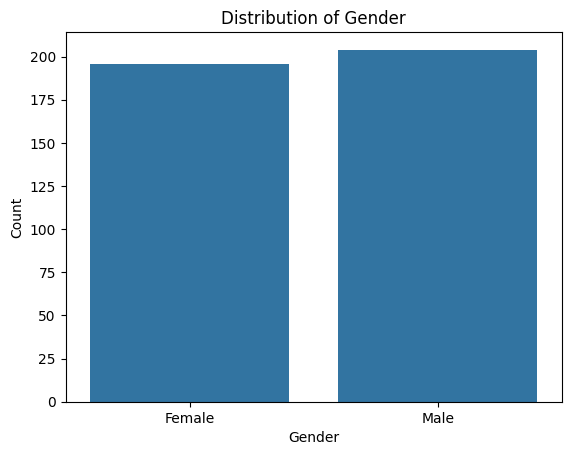

Average Salary by Gender:
Gender
Female    71759.803922
Male      67642.857143
Name: EstimatedSalary, dtype: float64


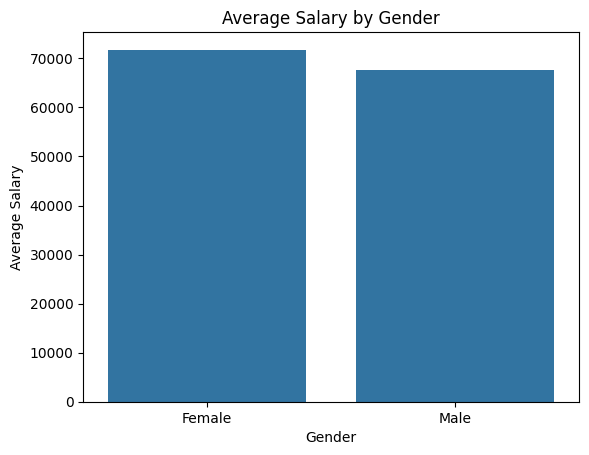

Purchasing Power by Gender:
Gender
Female    0.377451
Male      0.336735
Name: Purchased, dtype: float64


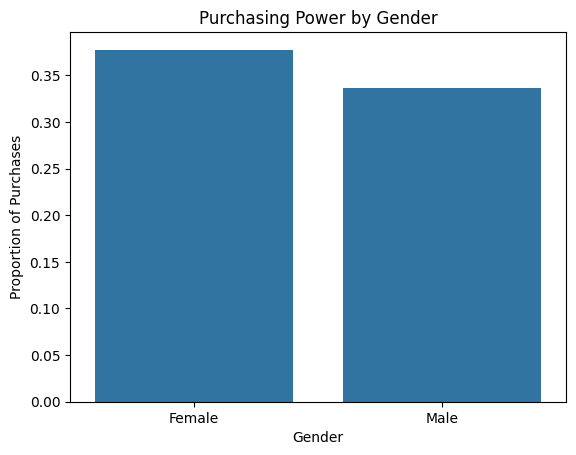

In [ ]:
# Count of male vs female
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Plot for gender distribution
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

# Average salary by gender
average_salary_by_gender = df.groupby('Gender')['EstimatedSalary'].mean()
print("Average Salary by Gender:")
print(average_salary_by_gender)

# Bar plot for average salary by gender
sns.barplot(x=average_salary_by_gender.index, y=average_salary_by_gender.values)
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

# Purchasing power by gender
purchasing_by_gender = df.groupby('Gender')['Purchased'].mean()
print("Purchasing Power by Gender:")
print(purchasing_by_gender)

# Bar plot for purchasing power by gender
sns.barplot(x=purchasing_by_gender.index, y=purchasing_by_gender.values)
plt.title('Purchasing Power by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion of Purchases')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

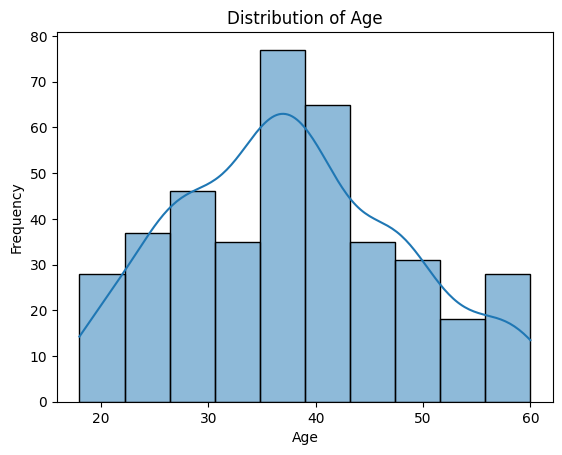

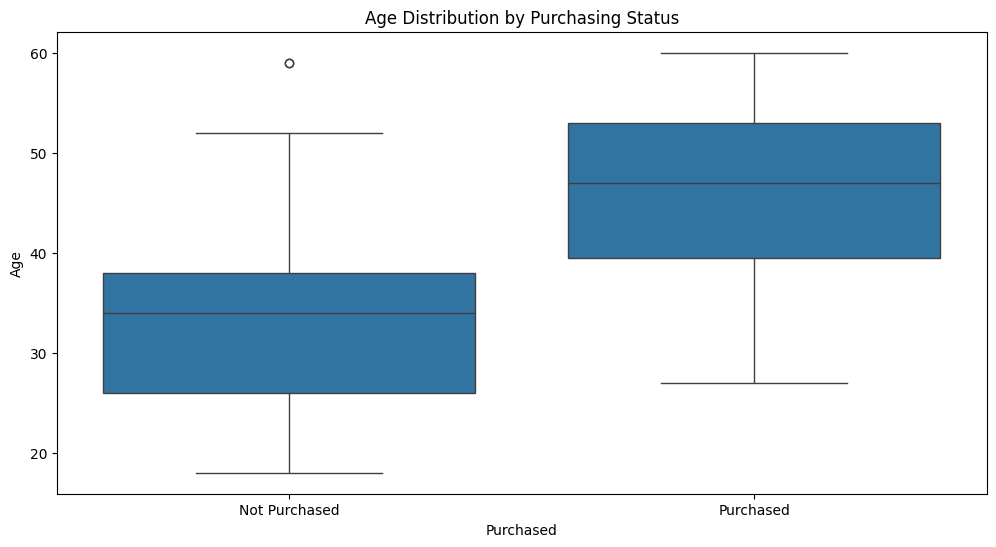

Average Age by Purchasing Status:
Purchased
0.0    32.793774
1.0    46.391608
Name: Age, dtype: float64


In [ ]:
# Histogram of age distribution
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Purchasing by age
plt.figure(figsize=(12, 6))
sns.boxplot(x='Purchased', y='Age', data=df)
plt.title('Age Distribution by Purchasing Status')
plt.xlabel('Purchased')
plt.ylabel('Age')
plt.xticks([0, 1], ['Not Purchased', 'Purchased'])
plt.show()

# Average age by purchasing status
average_age_by_purchasing = df.groupby('Purchased')['Age'].mean()
print("Average Age by Purchasing Status:")
print(average_age_by_purchasing)


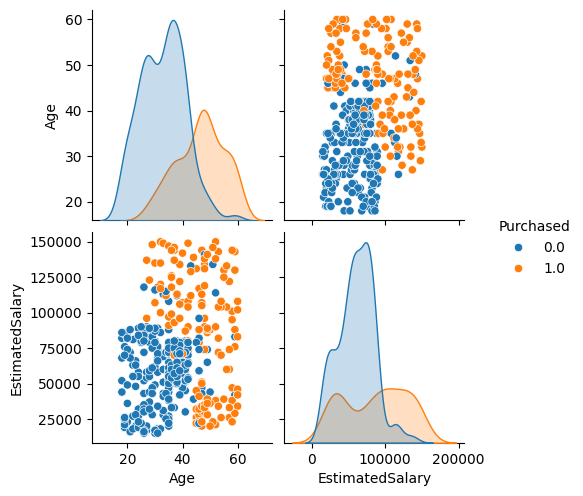

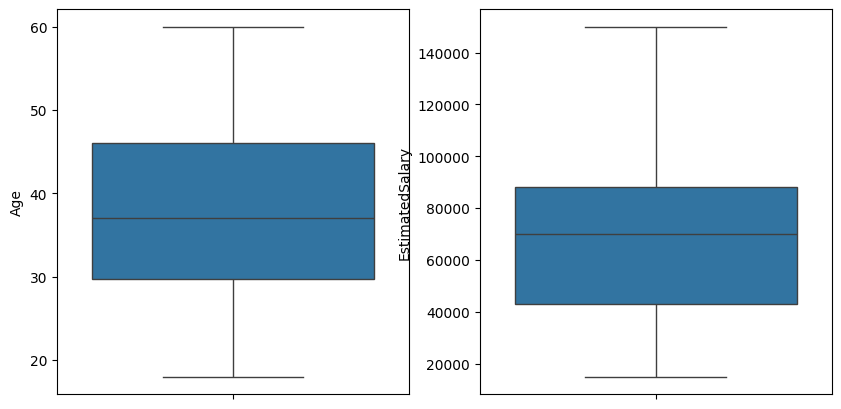

In [ ]:
# Pairplot to visualize relationships and distributions
sns.pairplot(df.drop(columns=['User ID']), hue='Purchased')


# Boxplot to check for outliers in 'Age' and 'EstimatedSalary'
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.boxplot(y=df['Age'])
plt.subplot(1,2,2)
sns.boxplot(y=df['EstimatedSalary'])
plt.show()


Here, we visualize the data to identify any potential outliers and understand distributions:
- `sns.pairplot()` creates a grid of Axes such that each variable in data will be shared across the y-axes across a single row and the x-axes across a single column. The hue is set to 'Purchased' to color points by their class.
- `sns.boxplot()` is used for detecting outliers. It shows the distribution of quantitative data that facilitates comparisons between variables.


In [ ]:
# Encoding categorical data
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Splitting the dataset into the training set and test set
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

This code block is for preparing our dataset for modeling:
- Encoding 'Gender' from categorical (Male, Female) to numerical (1, 0) to facilitate machine learning algorithms.
- Using `train_test_split` from scikit-learn to divide our data into training and testing sets, which helps in validating the performance of our model.


In [ ]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

We train a logistic regression model using scikit-learn's `LogisticRegression` class. This involves:
- Instantiating `LogisticRegression()`.
- Fitting the model on the training data (`X_train`, `y_train`), which involves learning the relationship between inputs and the target variable.


[[64  4]
 [ 7 25]]
Accuracy: 0.89
Precision: 0.8620689655172413


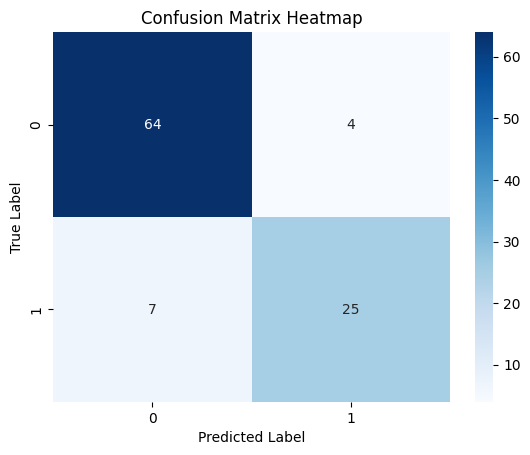

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print('Precision:', precision)

# Heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

After training the model, we evaluate its performance on the test set:
- `model.predict(X_test)` generates predictions based on the test set.
- `confusion_matrix` provides a matrix as output where each row represents the instances in an actual class while each column represents the instances in a predicted class.
- `accuracy_score` computes the accuracy, the fraction of correctly predicted instances.
- `precision_score` computes the precision, the ability of the classifier not to label as positive a sample that is negative.
- The heatmap of the confusion matrix visualizes the relationship between predicted and actual values, making it easier to see where the model is making mistakes.


Decision Tree Confusion Matrix:
[[63  5]
 [ 4 28]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93        68
         1.0       0.85      0.88      0.86        32

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



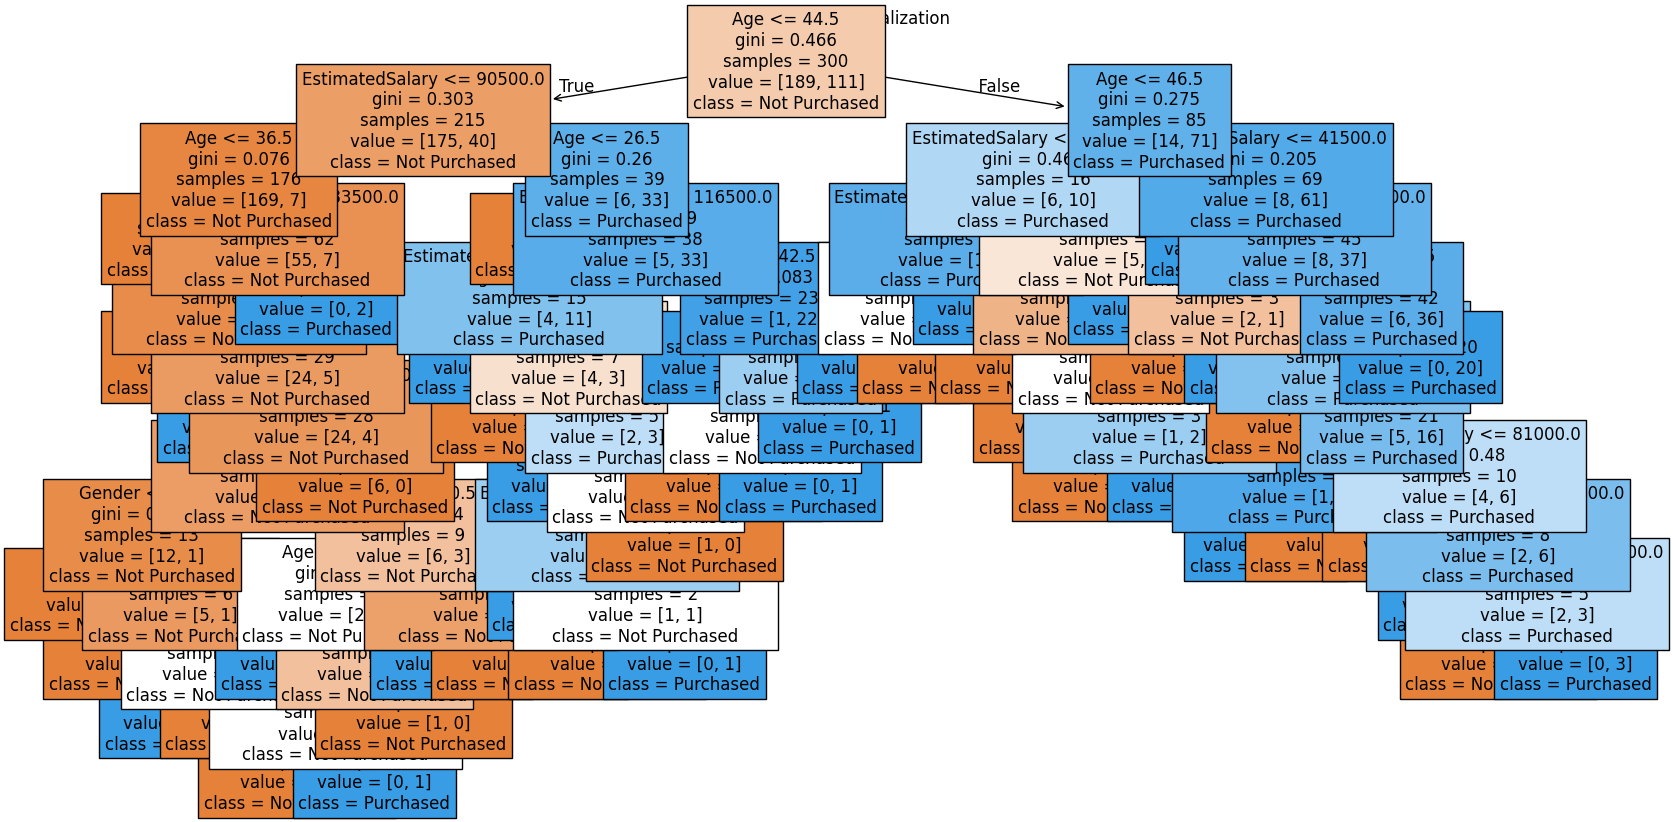

In [ ]:
# Training the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train, y_train)

# Making predictions with the Decision Tree model
dt_predictions = dt_classifier.predict(X_test)

# Confusion matrix, accuracy, precision, and recall for the Decision Tree model
dt_cm = confusion_matrix(y_test, dt_predictions)
dt_cr = classification_report(y_test, dt_predictions)
# Visualizing the decision tree
plt.figure(figsize=(20,10))
tree_plot = plot_tree(dt_classifier,
                      feature_names=X.columns,
                      class_names=['Not Purchased', 'Purchased'],
                      filled=True, impurity=True,
                      fontsize=12)
print("Decision Tree Confusion Matrix:")
print(dt_cm)
print("\nDecision Tree Classification Report:")
print(dt_cr)
plt.title('Decision Tree Visualization')
plt.show()

This section of the code initializes and trains a Decision Tree classifier. We start by creating an instance of the `DecisionTreeClassifier` from the `sklearn.tree` module with a specified `random_state` for reproducibility. The model is then trained using the `.fit()` method, which takes the training data `X_train` and the target labels `y_train` as inputs. The training process involves finding patterns in the data that best reduce a predefined criterion like Gini impurity or entropy, which measures the "messiness" of the labels.


After training, predictions are made on the test set `X_test` using the `.predict()` method of our trained decision tree. This method applies the decision rules learned from the training data to the new data in `X_test` to predict the outcomes, which are stored in `dt_predictions`.


Evaluation of the decision tree involves generating a confusion matrix and a classification report:
- The `confusion_matrix` function is used to compare the predicted labels (`dt_predictions`) against the actual labels (`y_test`). It produces a matrix (`dt_cm`) that shows the count of true negatives, false positives, false negatives, and true positives. This matrix is fundamental for understanding model performance in terms of type I and type II errors.
- The `classification_report` function generates a report (`dt_cr`) that includes precision, recall, and the F1 score for each class. Precision measures the accuracy of positive predictions. Recall, also known as sensitivity, measures the ability of the model to find all the relevant cases (i.e., true positives). F1 score is the weighted harmonic mean of precision and recall and is a better measure than accuracy in cases where the class distribution is uneven. The report provides these metrics for each class and also includes averages, giving a comprehensive overview of the model's performance.


Visualization of the decision tree is handled using `plot_tree` from `sklearn.tree`, which outputs a graphical representation of the decision rules and splits made by the model. The `plt.figure(figsize=(20,10))` command sets up the figure's size to make sure the tree diagram is spacious enough to be readable. The `plot_tree` function is then called with the trained model, `dt_classifier`, and several parameters to enhance the readability:

- `feature_names`: Labels for the features used in training.
- `class_names`: Names of the classes.
- `filled`: Colors the nodes to show majority class.
- `impurity`: Shows the impurity level at each node.
- `fontsize`: Sets the font size for text in the nodes.

The resulting tree helps in understanding how the model makes decisions, showing which features are most important for predictions and how different values of these features affect the outcome.

In [ ]:
# Training the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, y_train)

# Making predictions with the Random Forest model
rf_predictions = rf_classifier.predict(X_test)

# Confusion matrix, accuracy, precision, and recall for the Random Forest model
rf_cm = confusion_matrix(y_test, rf_predictions)
rf_cr = classification_report(y_test, rf_predictions)

print("Random Forest Confusion Matrix:")
print(rf_cm)
print("\nRandom Forest Classification Report:")
print(rf_cr)

Random Forest Confusion Matrix:
[[64  4]
 [ 4 28]]

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        68
         1.0       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



This section of the code creates and trains a Random Forest classifier, which is an ensemble learning method based on multiple decision trees to improve prediction accuracy and control overfitting. Here, we initialize the `RandomForestClassifier` from the `sklearn.ensemble` module specifying 100 trees (n_estimators) and a `random_state` for reproducibility. The `.fit()` method is used to train the model using the training data `X_train` and target labels `y_train`. The training process involves creating multiple decision trees, each trained on a random subset of the training data and features, which helps in reducing variance and bias.

Once the model is trained, predictions are made on the test dataset `X_test` using the `.predict()` method. This method aggregates predictions from all the individual trees within the forest (through majority voting for classification) to produce a final prediction for each sample, which is stored in `rf_predictions`.


Evaluation of the Random Forest model is conducted using the confusion matrix and classification report:

- The `confusion_matrix` function is utilized to compare the predicted labels (`rf_predictions`) against the actual labels (`y_test`), resulting in the matrix `rf_cm`. This matrix outlines the number of true negatives, false positives, false negatives, and true positives, providing clear insight into the model's performance with respect to each class.

- The `classification_report` function outputs a detailed report (`rf_cr`) that includes precision (the ratio of correctly predicted positive observations to the total predicted positives), recall (the ratio of correctly predicted positive observations to the all observations in actual class), and F1-score (the weighted average of Precision and Recall). This report is crucial for assessing the effectiveness of the model beyond simple accuracy, especially in datasets where class imbalance might be present.


- The Random Forest Confusion Matrix shows that out of 100 instances, 64 true negatives and 28 true positives were correctly identified, with only 4 false positives and 4 false negatives. This indicates a high level of accuracy in classification, particularly in distinguishing both classes.

- The Classification Report provides a deeper insight:
  - Precision for class 0 (Not Purchased) is 0.94, indicating high reliability in the model’s prediction when it predicts a non-purchase.
  - Recall for class 0 is also 0.94, which means the model successfully identifies 94% of all actual non-purchases.
  - For class 1 (Purchased), both precision and recall are 0.88, showing that predictions for purchases are also reliable and accurate.
  - The overall accuracy of the model is 0.92, suggesting excellent general performance across both classes.

The macro average and weighted average scores provide a comprehensive view, factoring in the balance between classes and showing that the model performs well across the board.

Decision Tree Accuracy: 0.91
Random Forest Accuracy: 0.92


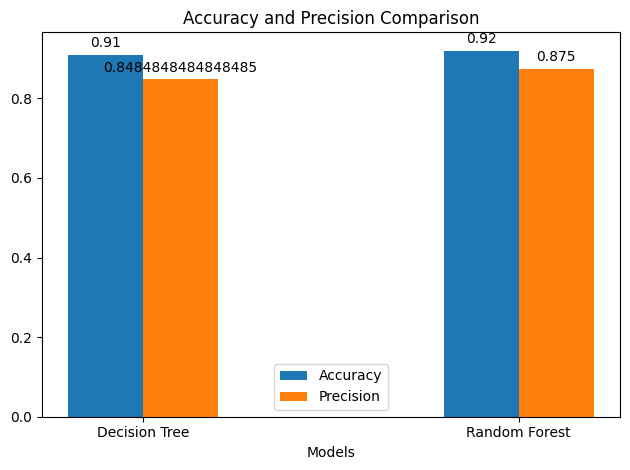

In [ ]:
# Data to plot

# Assuming Decision Tree and Random Forest have been trained and predictions made:
# Decision Tree evaluation
accuracy_dt = accuracy_score(y_test, dt_predictions)
precision_dt = precision_score(y_test, dt_predictions)

# Random Forest evaluation
accuracy_rf = accuracy_score(y_test, rf_predictions)
precision_rf = precision_score(y_test, rf_predictions)
print("Decision Tree Accuracy:", accuracy_dt)
print("Random Forest Accuracy:", accuracy_rf)

labels = ['Decision Tree', 'Random Forest']
accuracy_scores = [accuracy_dt, accuracy_rf]
precision_scores = [precision_dt, precision_rf]

x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x + width/2, precision_scores, width, label='Precision')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_title('Accuracy and Precision Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to attach a text label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

1. Data Setup

plaintext
Copy code
The first part of the code sets up the data for plotting:
- `labels` contains the names of the models, used for the x-axis labels.
- `accuracy_scores` and `precision_scores` hold the respective metrics for each model, which were calculated earlier in your code when evaluating the models.
- `x` computes an array of label locations, which helps in positioning the bars on the plot.
- `width` defines the width of each bar, which is set to 20% of the x-tick interval.
2. Plot Initialization

plaintext
Copy code
- `fig, ax = plt.subplots()` initializes a new figure and a set of subplots. Here, `ax` is used to plot the bar charts.
- `rects1` and `rects2` create the bar plots using `ax.bar`. The first call plots the accuracy bars, offset to the left by half the width of a bar. The second call plots the precision bars, offset to the right by the same amount. This arrangement places the bars side by side for each model.
3. Enhancing the Plot

plaintext
Copy code
- `ax.set_xlabel('Models')` sets the label for the x-axis.
- `ax.set_title('Accuracy and Precision Comparison')` adds a title to the top of the plot, indicating what the chart represents.
- `ax.set_xticks(x)` and `ax.set_xticklabels(labels)` set the positions and labels of the ticks on the x-axis. These correspond to the models being compared.
- `ax.legend()` adds a legend to the plot to differentiate between the accuracy and precision bars, making it clear which bar represents which metric.
4. Adding Data Labels to Bars

plaintext
Copy code
The `autolabel` function adds a text label above each bar that displays its height, which represents the metric value:
- It iterates over each rectangle (bar) in the plot.
- For each rectangle, it calculates the height and places a text annotation at the top center of the bar. The annotation shows the value of the height rounded to the nearest integer or decimal, depending on the data.
- `xy` parameter specifies the annotation position, which is centered on the bar.
- `xytext` specifies the offset of the text from the top of the bar to avoid overlapping with the bar itself.
5. Layout Adjustment

plaintext
Copy code
- `fig.tight_layout()` adjusts the layout of the plot to make sure that everything fits well within the figure area without any clipping. This method is especially useful when labels, titles, or legends are cut off in the initial rendering.
6. Display the Plot

plaintext
Copy code
- `plt.show()` renders the plot. This function is called to display the figure window when the script is run interactively or in notebooks.